### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
tiendas = [tienda, tienda2, tienda3, tienda4]
tiendas

[               Producto Categoría del Producto     Precio  Costo de envío  \
 0     Asistente virtual           Electrónicos   164300.0          6900.0   
 1       Mesa de comedor                Muebles   192300.0          8400.0   
 2         Juego de mesa               Juguetes   209600.0         15900.0   
 3            Microondas      Electrodomésticos   757500.0         41000.0   
 4      Silla de oficina                Muebles   335200.0         20200.0   
 ...                 ...                    ...        ...             ...   
 2354          Iphone 15           Electrónicos  1284400.0         66600.0   
 2355          Impresora           Electrónicos   282800.0         15300.0   
 2356      Juego de mesa               Juguetes   122900.0          7200.0   
 2357           Cama box                Muebles   691300.0         35000.0   
 2358         Smartwatch           Electrónicos   195000.0          8600.0   
 
      Fecha de Compra         Vendedor Lugar de Compra  Califi

In [ ]:
for idx, tienda in enumerate(tiendas, start=1):
    print(f"Tienda {idx} es de tipo: {type(tienda)}")

Tienda 1 es de tipo: <class 'pandas.core.frame.DataFrame'>
Tienda 2 es de tipo: <class 'pandas.core.frame.DataFrame'>
Tienda 3 es de tipo: <class 'pandas.core.frame.DataFrame'>
Tienda 4 es de tipo: <class 'pandas.core.frame.DataFrame'>


In [ ]:
facturacion_total = {}
for idx, tienda in enumerate(tiendas, start=1):
    facturacion_total[f'Tienda {idx}'] = tienda['Precio'].sum()

In [ ]:
print("Análisis de facturación:")
for tienda, total in facturacion_total.items():
    print(f"{tienda}: ${total:.2f}")

Análisis de facturación:
Tienda 1: $1150880400.00
Tienda 2: $1116343500.00
Tienda 3: $1098019600.00
Tienda 4: $1038375700.00


# 2. Ventas por categoría

In [ ]:
ventas_categoria = {}
for idx, tienda in enumerate(tiendas, start=1):
    categorias_vendidas = tienda.groupby('Categoría del Producto')['Producto'].count()
    ventas_categoria[f'Tienda {idx}'] = categorias_vendidas

In [ ]:
print("\nVentas por categoría:")
for tienda, categorias in ventas_categoria.items():
    print(f"\n{tienda}:")
    print(categorias)


Ventas por categoría:

Tienda 1:
Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
Name: Producto, dtype: int64

Tienda 2:
Categoría del Producto
Artículos para el hogar    181
Deportes y diversión       275
Electrodomésticos          305
Electrónicos               422
Instrumentos musicales     224
Juguetes                   313
Libros                     197
Muebles                    442
Name: Producto, dtype: int64

Tienda 3:
Categoría del Producto
Artículos para el hogar    177
Deportes y diversión       277
Electrodomésticos          278
Electrónicos               451
Instrumentos musicales     177
Juguetes                   315
Libros                     185
Muebles                    499
Name: Producto, dtype: int64

Tienda 4:
Categoría del Producto
Artículos 

# 3. Calificación promedio de la tienda


In [ ]:
calificacion_promedio = {}
for idx, tienda in enumerate(tiendas, start=1):
    calificacion_promedio[f'Tienda {idx}'] = tienda['Calificación'].mean()

In [ ]:
print("\nCalificación promedio de la tienda:")
for tienda, promedio in calificacion_promedio.items():
    print(f"{tienda}: {promedio:.2f}")


Calificación promedio de la tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
productos_vendidos = {}
for idx, tienda in enumerate(tiendas, start=1):
    productos = tienda['Producto'].value_counts()
    productos_vendidos[f'Tienda {idx}'] = {
        'más vendidos': productos.idxmax(),
        'menos vendidos': productos.idxmin()
    }

In [ ]:
print("\nProductos más y menos vendidos:")
for tienda, productos in productos_vendidos.items():
    print(f"{tienda}: Más vendido - {productos['más vendidos']}, Menos vendido - {productos['menos vendidos']}")


Productos más y menos vendidos:
Tienda 1: Más vendido - Microondas, Menos vendido - Auriculares con micrófono
Tienda 2: Más vendido - Iniciando en programación, Menos vendido - Juego de mesa
Tienda 3: Más vendido - Kit de bancas, Menos vendido - Bloques de construcción
Tienda 4: Más vendido - Cama box, Menos vendido - Guitarra eléctrica


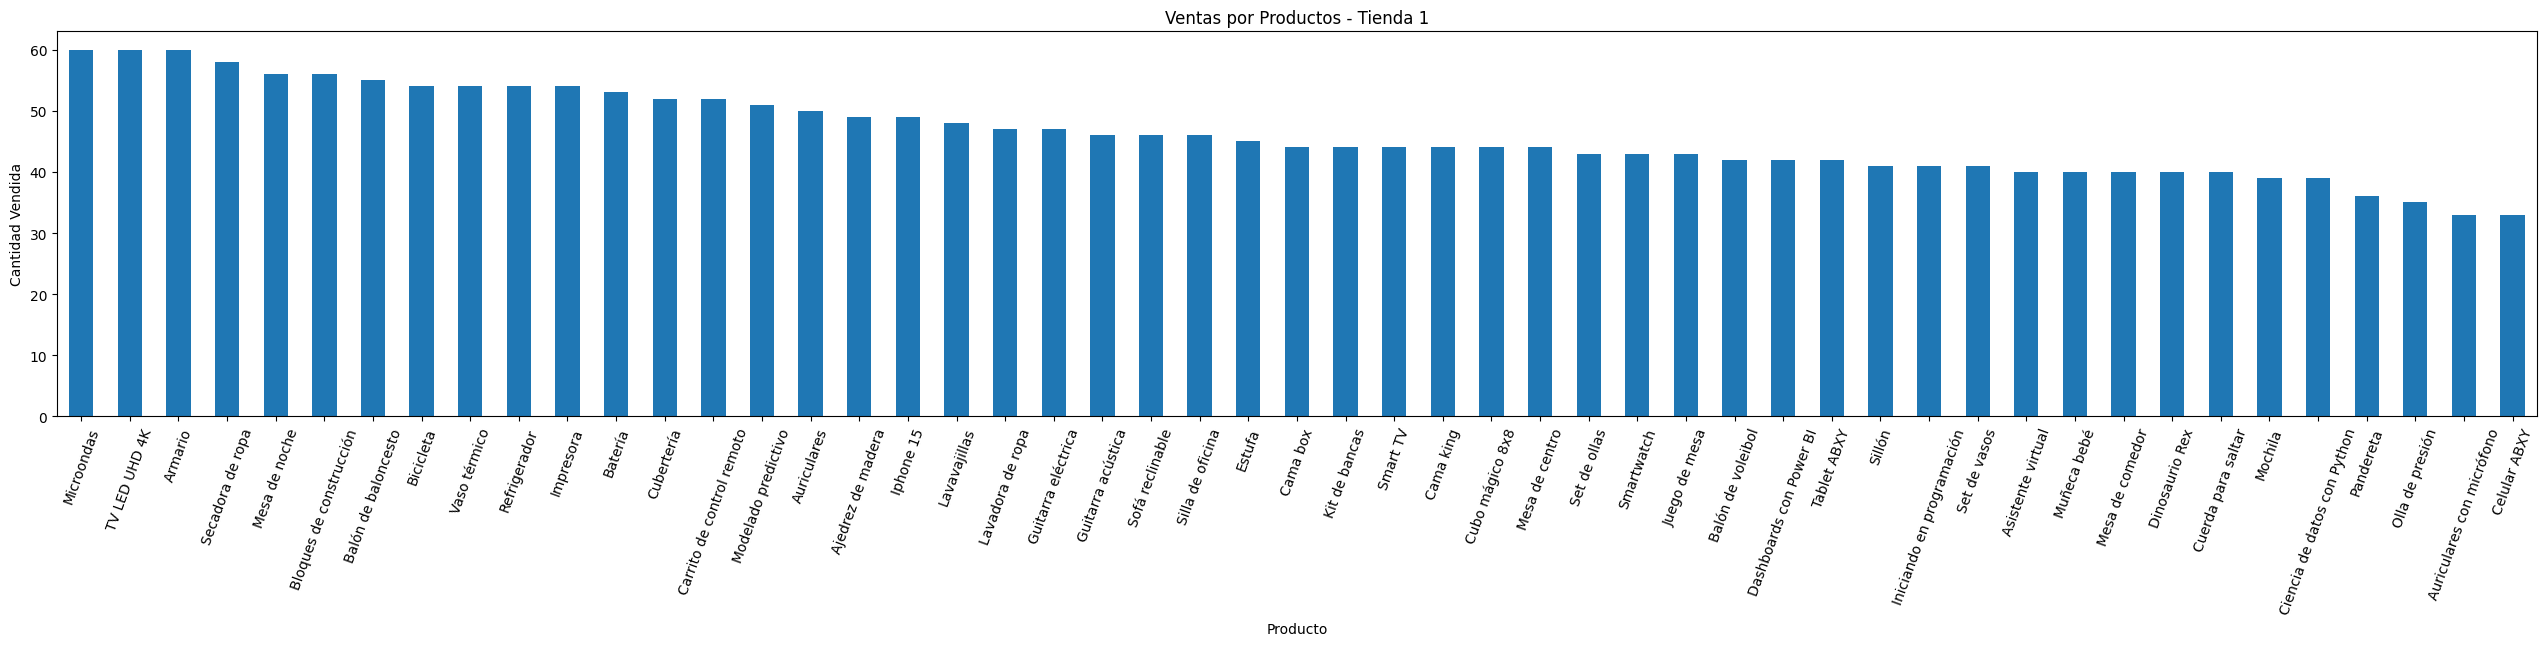

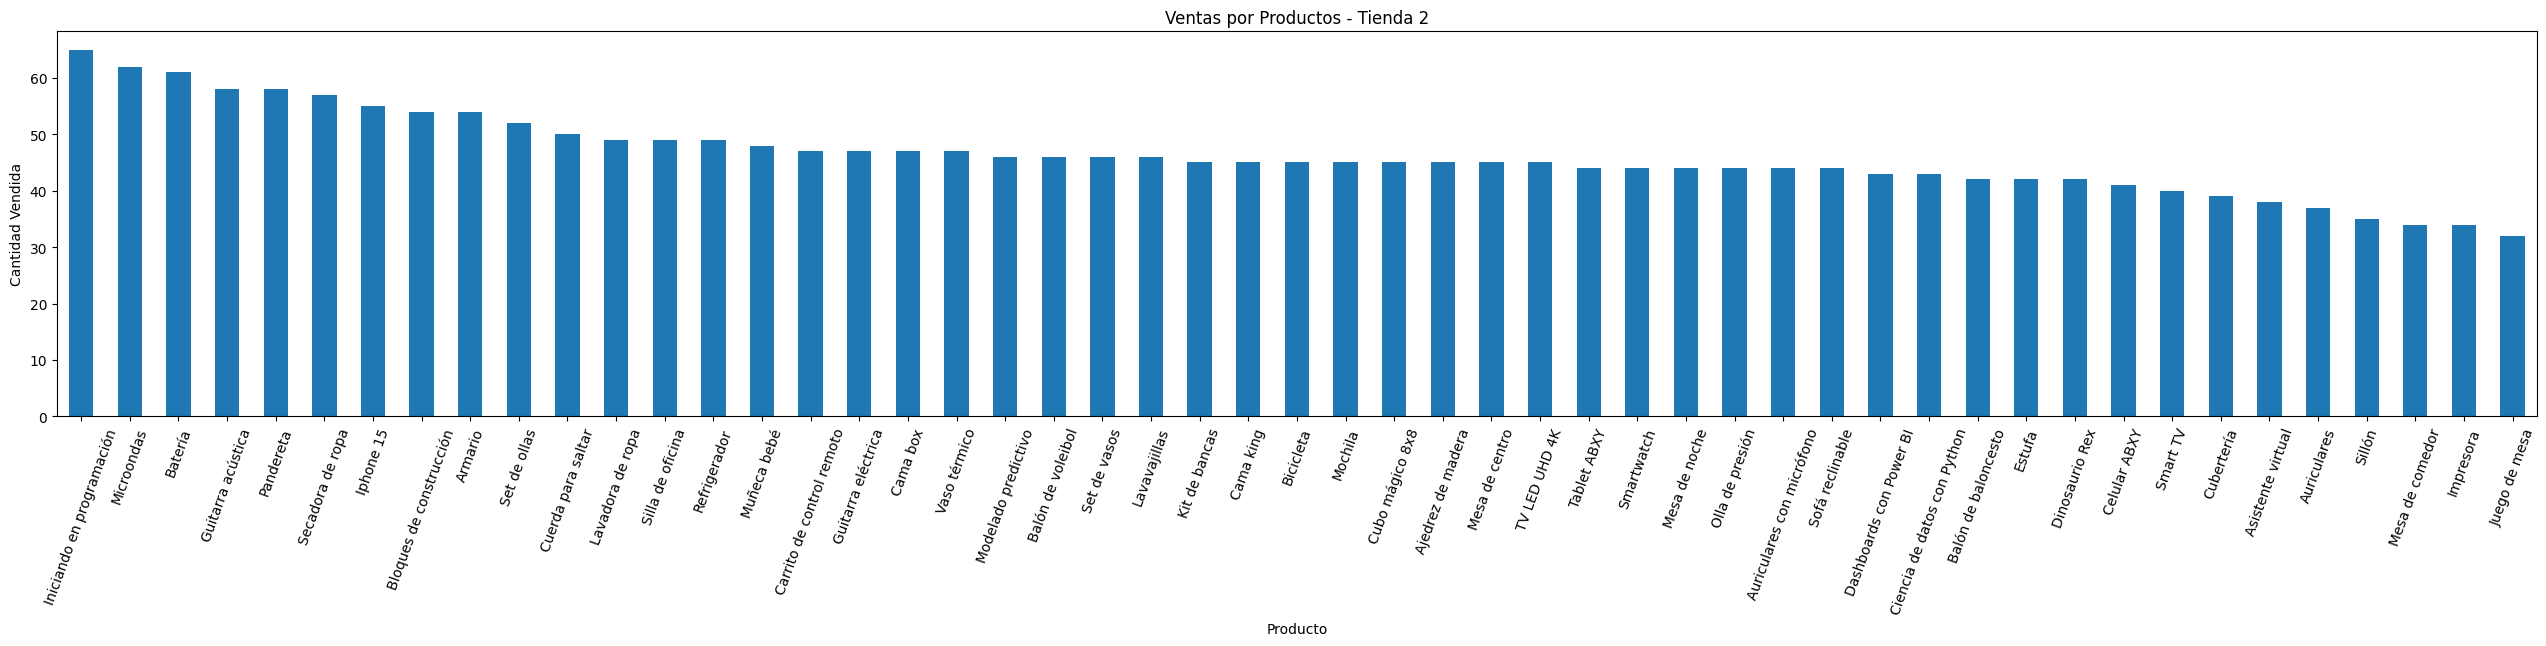

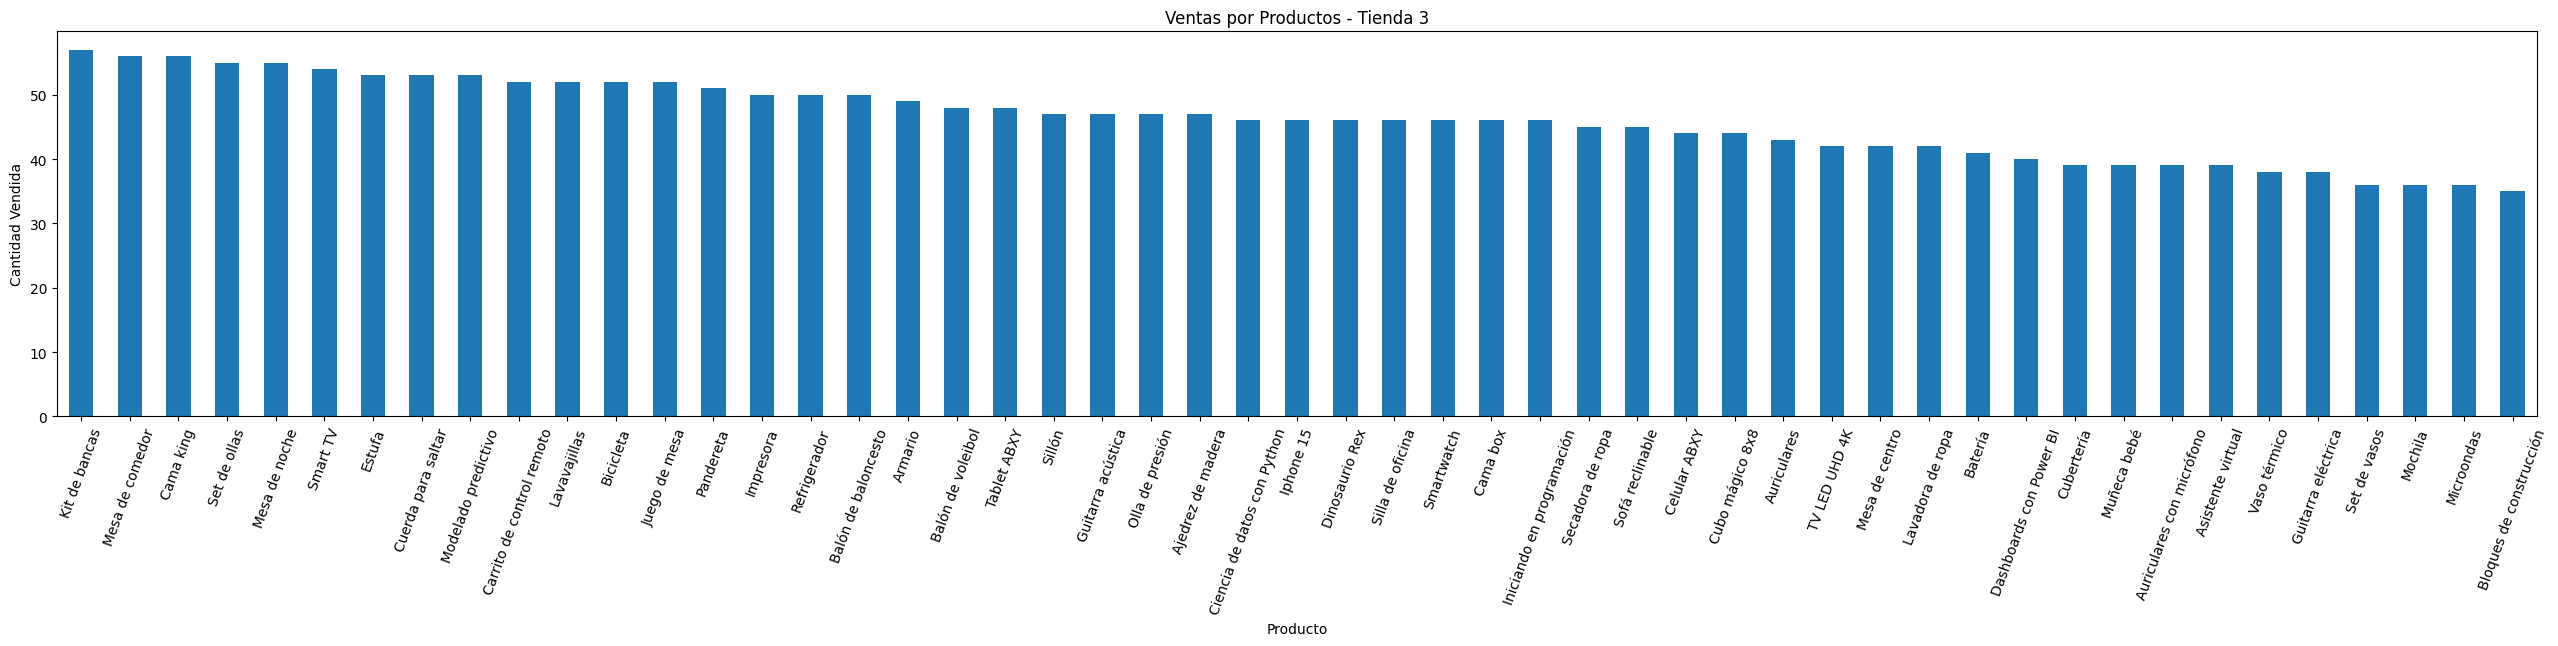

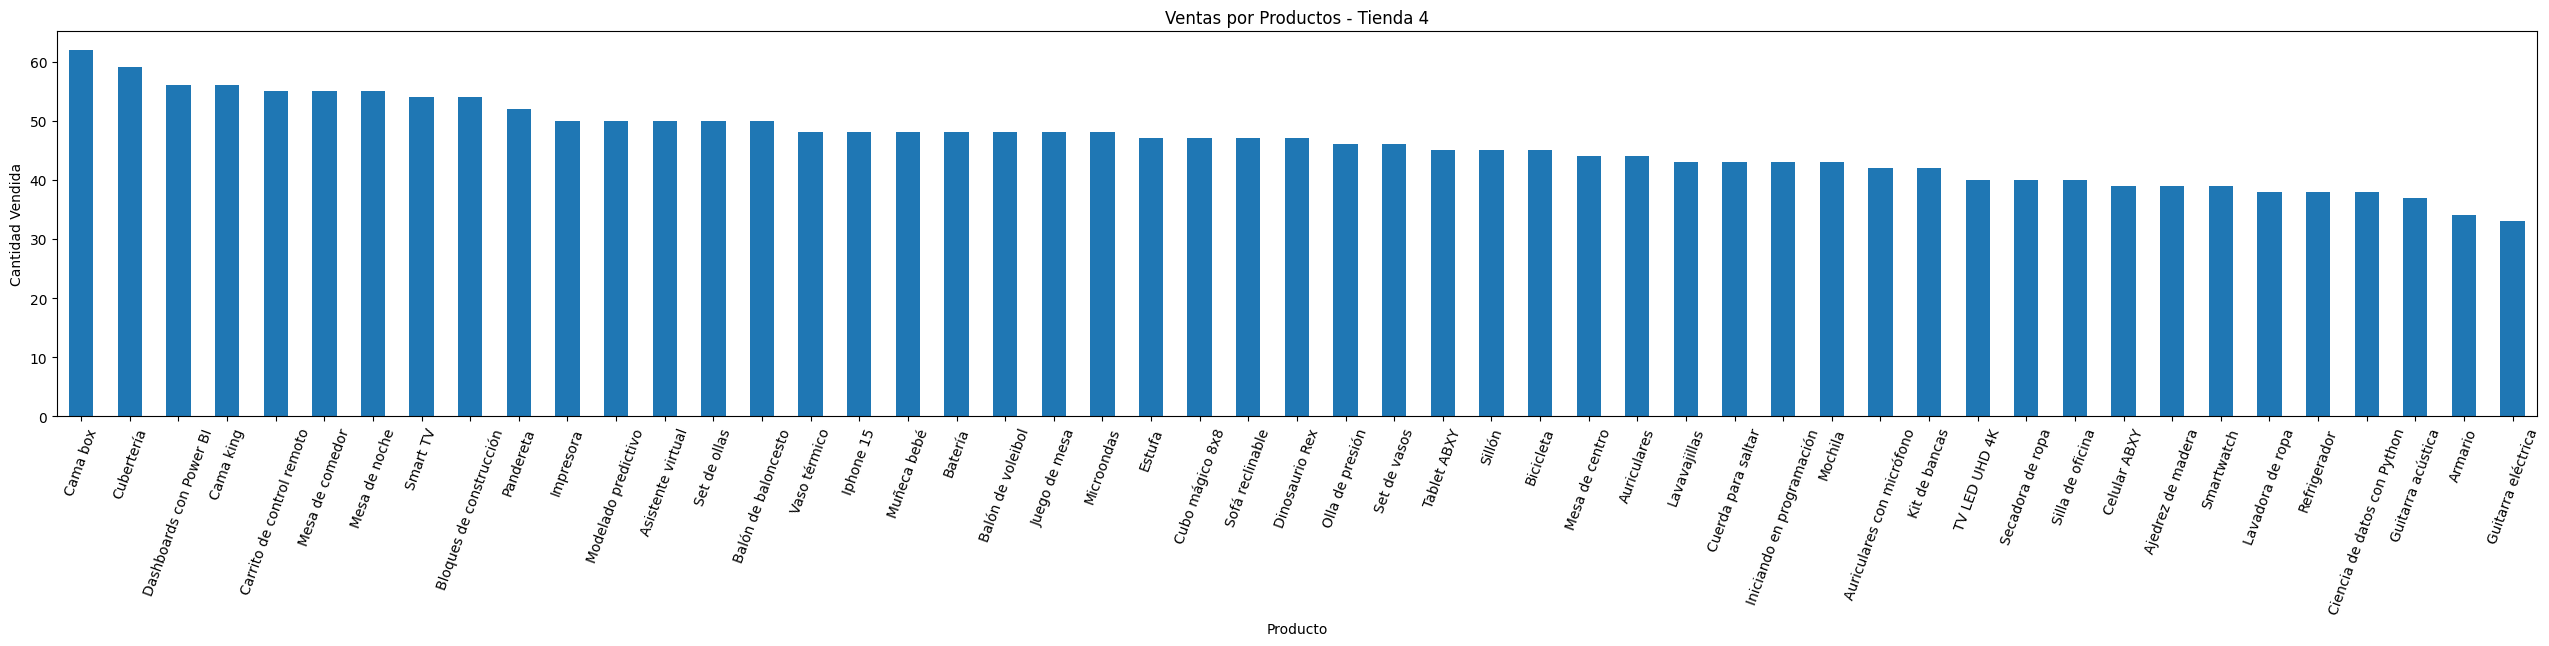

In [ ]:
for idx, tienda in enumerate(tiendas, start=1):
    plt.figure(figsize=(32, 5))
    tienda['Producto'].value_counts().plot(kind='bar')
    plt.title(f'Ventas por Productos - Tienda {idx}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=70)
    plt.show()

# 5. Envío promedio por tienda

In [ ]:
envio_promedio = {}
for idx, tienda in enumerate(tiendas, start=1):
    envio_promedio[f'Tienda {idx}'] = tienda['Costo de envío'].mean()

In [ ]:
print("\nEnvío promedio por tienda:")
for tienda, promedio in envio_promedio.items():
    print(f"{tienda}: ${promedio:.2f}")


Envío promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


# **Resultados expuestos en gráficos**

In [ ]:
import numpy as np

In [ ]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturacion = [1150880400.00, 1116343500.00, 1098019600.00, 1038375700.00]
calificaciones = [3.98, 4.04, 4.05, 4.00]
envios = [26018.61, 25216.24, 24805.68, 23459.46]

In [ ]:
categorias_tienda1 = ['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
ventas_tienda1 = [171, 284, 312, 448, 182, 324, 173, 465]
ventas_tienda2 = [181, 275, 305, 422, 224, 313, 197, 442]
ventas_tienda3 = [177, 277, 278, 451, 177, 315, 185, 499]
ventas_tienda4 = [201, 277, 254, 451, 170, 338, 187, 480]

# 1. Análisis de facturación

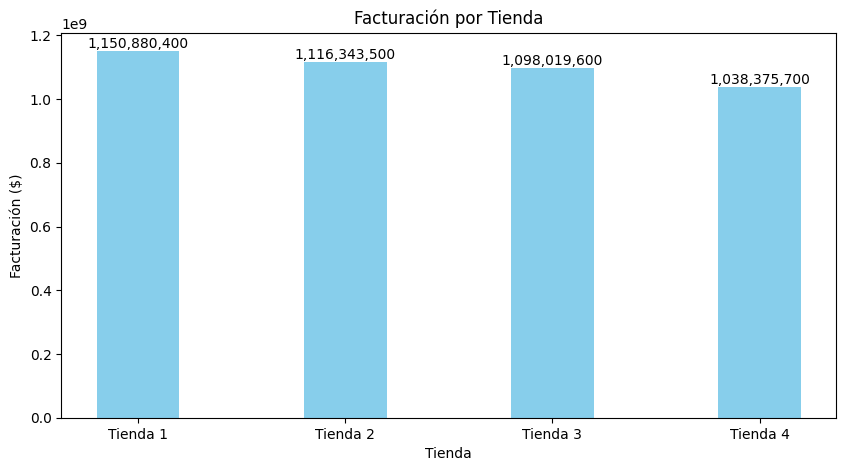

In [ ]:
x = np.arange(len(tiendas))
plt.figure(figsize=(10, 5))
width = 0.4
bars = plt.bar(x, facturacion, width, color='skyblue')
plt.title('Facturación por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación ($)')
plt.xticks(x, tiendas)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom')
plt.show()

# 2. Análisis de ventas por categoría



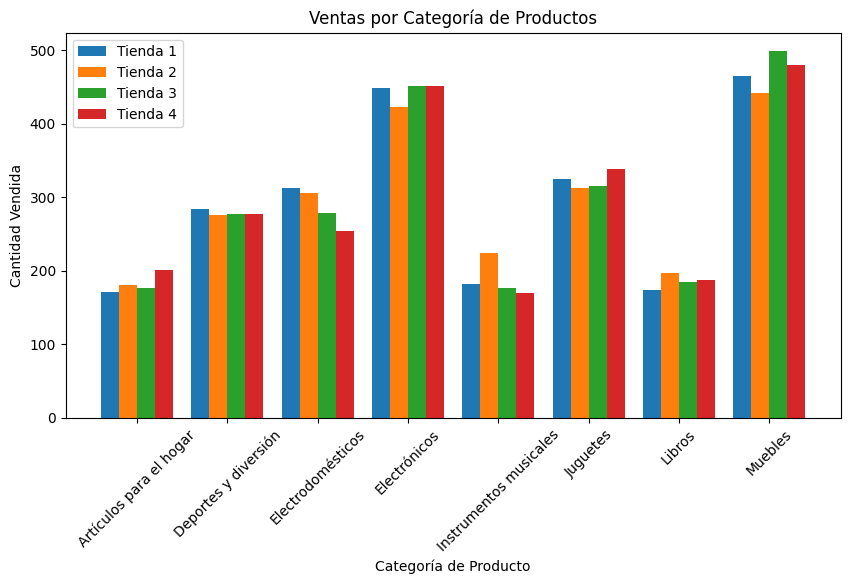

In [ ]:
plt.figure(figsize=(10, 5))
x = np.arange(len(categorias_tienda1))
width = 0.2

plt.bar(x - width*1.5, ventas_tienda1, width, label='Tienda 1')
plt.bar(x - width/2, ventas_tienda2, width, label='Tienda 2')
plt.bar(x + width/2, ventas_tienda3, width, label='Tienda 3')
plt.bar(x + width*1.5, ventas_tienda4, width, label='Tienda 4')

plt.title('Ventas por Categoría de Productos')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(x, categorias_tienda1, rotation=45)
plt.legend()
plt.show()

# 3. Calificación promedio de la tienda

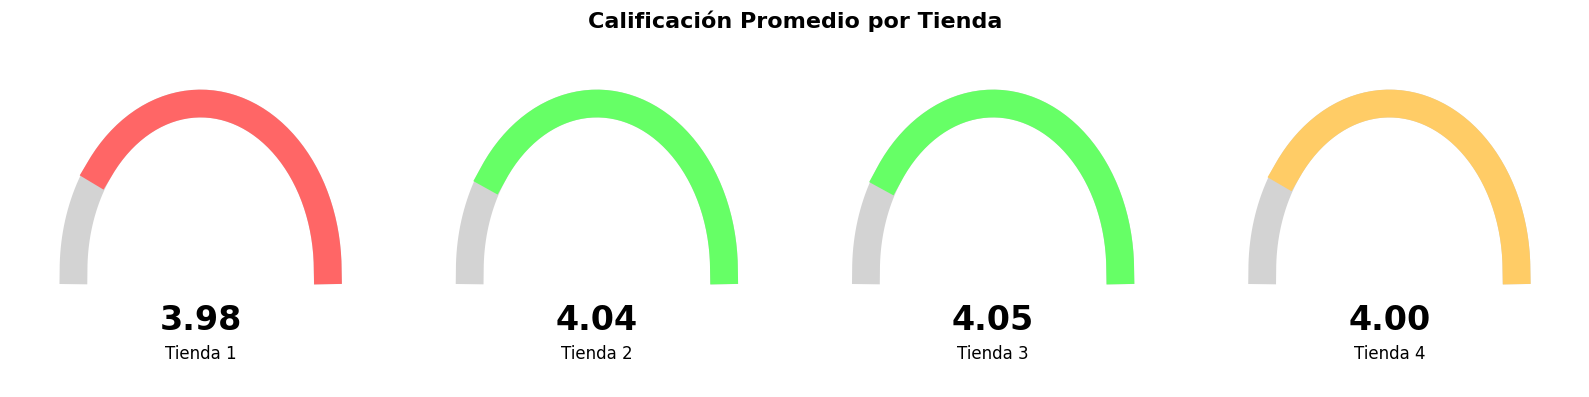

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones = [3.98, 4.04, 4.05, 4.00]


fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Calificación Promedio por Tienda', fontsize=16, fontweight='bold')


def crear_gauge(ax, valor, titulo, max_val=5.0):

    theta = np.linspace(0, np.pi, 100)
    radius = 1
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)


    ax.plot(x, y, 'lightgray', linewidth=20)


    angle = (valor / max_val) * np.pi
    x_val = radius * np.cos(angle)
    y_val = radius * np.sin(angle)


    theta_progress = np.linspace(0, angle, 50)
    x_progress = radius * np.cos(theta_progress)
    y_progress = radius * np.sin(theta_progress)


    if valor < 4.0:
        color = '#ff6666'
    elif valor < 4.03:
        color = '#ffcc66'
    else:
        color = '#66ff66'

    ax.plot(x_progress, y_progress, color, linewidth=20)


    ax.text(0, -0.3, f'{valor:.2f}', ha='center', va='center', fontsize=24, fontweight='bold')
    ax.text(0, -0.5, titulo, ha='center', va='center', fontsize=12)


    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-0.7, 1.3)
    ax.axis('off')


for i, (ax, tienda, calif) in enumerate(zip(axes, tiendas, calificaciones)):
    crear_gauge(ax, calif, tienda)

plt.tight_layout()
plt.show()

# **Conclusión**

Después de analizar los cinco puntos, la Tienda 3 se destaca como la mejor opción para invertir debido a su:



*   Mayor Facturación: $150.000.
*   Más Alta Calificación Promedio: 4,05.

*   El envío promedio más bajo: $3.50, lo que puede aumentar la satisfacción del cliente y potencialmente aumentar las ventas.
*   Fuertes Ventas en Productos Electrónicos, que suelen tener márgenes de ganancia más altos.







